In [3]:
import os
import sys
import logging
# import glob
# import time
# import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Custom packages
import iXAtom_Class_Physics       as iXC_Physics
import iXAtom_Class_RunParameters as iXC_RunPars
import iXAtom_Class_Detector      as iXC_Detect
import iXAtom_Class_Ramsey        as iXC_Ramsey
import iXAtom_Utilities           as iXUtils

# For inline plots
%matplotlib inline
# Reload IPython extension 'autoreload'
%reload_ext autoreload
# autoreload: Reload all modules (except those excluded by %aimport) automatically now
# autoreload 0: Disable automatic reloading of modules
# autoreload 1: Reload all modules imported with %aimport every time before executing
# autoreload 2: Reload all modules (except those excluded by %aimport) every time before executing
%autoreload 1

%aimport iXAtom_Class_Physics
%aimport iXAtom_Class_RunParameters
%aimport iXAtom_Class_Detector
%aimport iXAtom_Class_Ramsey
%aimport iXAtom_Utilities

logging.disable(level=logging.NOTSET)

iXUtils.SetDefaultPlotOptions()

In [4]:
RootDir = 'C:\\Bryns Goodies\\Work-iXAtom\\Data 2020'
Date    = {'Month': 'March', 'Day': 10}
WorkDir = os.path.join(RootDir, Date['Month'], '{:02d}'.format(Date['Day']))
Folder  = 'Raman'
RunNum  = 1

RunPars = iXC_RunPars.RunParameters(WorkDir, Folder, RunNum)
RunPars.LoadRunParameters()

Physics = iXC_Physics.Physics(RunPars)
keff    = RunPars.keff
gLocal  = RunPars.gLocal

pd.DataFrame(RunPars.__dict__.items())

ERROR:root:iXC_RunPars::GetAttributes::Parameter file not found in: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\10\Raman\Run 01
ERROR:root:iXC_RunPars::GetAttributes::Aborting...


NameError: name 'quit' is not defined

In [ ]:
#========================================================================================= 
#  Load analysis summary results for specific runs on specific days
#=========================================================================================

DateList = [{'Month': 'March', 'Day': 10}, {'Month': 'March', 'Day': 11}, {'Month': 'March', 'Day': 12},
            {'Month': 'March', 'Day': 12}, {'Month': 'March', 'Day': 12}, {'Month': 'March', 'Day': 13},
            {'Month': 'March', 'Day': 13}]
RunLists = [[1,30], [23,52], [1,30], [31,60], [61,90], [36,65], [76,105]]
TiltList = [45.,39.,35.,30.,23.,15.,10.] ## deg
Colors   = ['red', 'blue', 'green', 'purple', 'darkorange', 'deeppink', 'brown']
iStarts  = [0,0,0,0,0,0,0]
nSummary = len(RunLists)

SummaryDF = [[[pd.DataFrame([]) for ik in range(2)] for iax in range(3)] for s in range(nSummary)]

for s in range(nSummary):
    RunList = RunLists[s]
    WorkDir = os.path.join(RootDir, DateList[s]['Month'], '{:02d}'.format(DateList[s]['Day']))
    RunPars = iXC_RunPars.RunParameters(WorkDir, Folder, RunList[0])
    RunPars.LoadRunParameters()

    SummaryFolder     = os.path.join(WorkDir, 'PostProcessed', Folder)
    SummaryFilePrefix = Folder+'-Runs{:02d}-{:02d}-AnalysisSummary-'.format(min(RunList), max(RunList))

    for iax in range(3):
        for ik in range(2):
            SummaryFilePath = os.path.join(SummaryFolder, SummaryFilePrefix+RunPars.AxisFileLabels[iax][ik]+'.txt')
            if os.path.exists(SummaryFilePath):
                print('Loading summary file: {}'.format(SummaryFilePath))
                SummaryDF[s][iax][ik] = pd.read_csv(SummaryFilePath, sep='\t')                
                if DateList[s]['Day'] == 13 and RunLists[s] == [76,105]:
                    print('Dropping elements from summary...')
                    SummaryDF[s][iax][ik].drop([8], inplace=True)
                SummaryDF[s][iax][ik].sort_values(by=['RamanT'], inplace=True)
            else:
                print('Summary file not found: {}'.format(SummaryFilePath))

Loading summary file: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\10\PostProcessed\Raman\Raman-Runs01-30-AnalysisSummary-X-kU.txt
Loading summary file: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\10\PostProcessed\Raman\Raman-Runs01-30-AnalysisSummary-X-kD.txt
Loading summary file: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\10\PostProcessed\Raman\Raman-Runs01-30-AnalysisSummary-Y-kU.txt
Loading summary file: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\10\PostProcessed\Raman\Raman-Runs01-30-AnalysisSummary-Y-kD.txt
Loading summary file: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\10\PostProcessed\Raman\Raman-Runs01-30-AnalysisSummary-Z-kU.txt
Loading summary file: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\10\PostProcessed\Raman\Raman-Runs01-30-AnalysisSummary-Z-kD.txt
Loading summary file: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\11\PostProcessed\Raman\Raman-Runs23-52-AnalysisSummary-X-kU.txt
Loading summary file: C:\Bryns Goodies\Work-iXAtom\Data 2020\March\11\PostProcessed

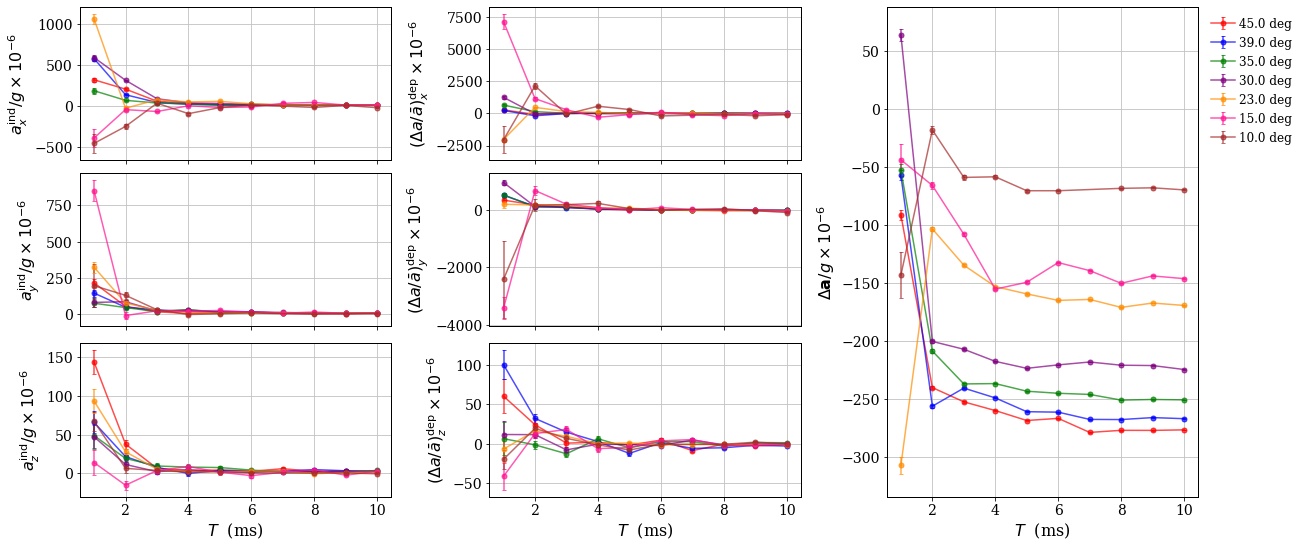

In [7]:
#========================================================================================= 
#  Plot analysis summary results for specific runs on specific days
#=========================================================================================

## Set plot options
plt.rc('font', size=14, family='serif')
plt.rc('axes', titlesize=12, labelsize=16, edgecolor='black', linewidth=1)
plt.rc('lines', linewidth=1.5, markersize=10)
plt.rc('legend', fontsize=12, frameon=False, handletextpad=0.4)

PlotOpts = {'Color': 'red', 'Linestyle': 'None', 'Marker': '.', 'Title': 'None',
            'xLabel': 'None', 'yLabel': 'None', 'LegLabel': 'None', 'Legend': False,
            'LegLocation': 'best'}

(nRows, nCols) = (3,3)
# fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize=(nCols*6,nRows*3), sharex='col', constrained_layout=True)

fig  = plt.figure(figsize=(nCols*6,nRows*2.5), constrained_layout=True)
gs   = fig.add_gridspec(nrows=nRows, ncols=nCols)
ax00 = fig.add_subplot(gs[0,0])
ax10 = fig.add_subplot(gs[1,0])
ax20 = fig.add_subplot(gs[2,0])
ax01 = fig.add_subplot(gs[0,1])
ax11 = fig.add_subplot(gs[1,1])
ax21 = fig.add_subplot(gs[2,1])
ax_2 = fig.add_subplot(gs[:,2])
axs  = np.array([[ax00, ax01, ax_2], [ax10, ax11, ax_2], [ax20, ax21, ax_2]])

axs[0,0].get_shared_x_axes().join(*axs[:,0])
axs[0,1].get_shared_x_axes().join(*axs[:,1])

axs[0,0].set_xticklabels([])
axs[0,1].set_xticklabels([])
axs[1,0].set_xticklabels([])
axs[1,1].set_xticklabels([])

logScale = False

if logScale:
    yLabels = [[r'$|a^{\rm ind}_x|/g$', r'$|a^{\rm ind}_y|/g$', r'$|a^{\rm ind}_z|/g$'],
               [r'$(|\Delta a|/\bar{a})^{\rm dep}_x$', r'$(|\Delta a|/\bar{a})^{\rm dep}_y$', r'$(|\Delta a|/\bar{a})^{\rm dep}_z$']]
    PlotOpts['Linestyle'] = '-'
else:
    yLabels = [[r'$a^{\rm ind}_x/g \times 10^{-6}$', r'$a^{\rm ind}_y/g \times 10^{-6}$', r'$a^{\rm ind}_z/g \times 10^{-6}$'],
               [r'$(\Delta a/\bar{a})^{\rm dep}_x \times 10^{-6}$', r'$(\Delta a/\bar{a})^{\rm dep}_y \times 10^{-6}$', r'$(\Delta a/\bar{a})^{\rm dep}_z \times 10^{-6}$']]
    PlotOpts['Linestyle'] = '-'

for s in range(nSummary):
    aExp   = np.empty((3,4,2), dtype=object) ## [iax,ik,iErr]
    gExp   = np.empty(2, dtype=object) ## [iErr]
    RamanT = SummaryDF[s][0][0]['RamanT'].to_numpy()
    
    PlotOpts['Color'] = Colors[s]

    for iax in range(3):
        for ik in range(2):
            aExp[iax,ik,0] = SummaryDF[s][iax][ik]['gExp'].to_numpy()
            aExp[iax,ik,1] = SummaryDF[s][iax][ik]['gExp_Err'].to_numpy()
        
        aExp[iax,2,0] = 0.5*(aExp[iax,0,0] - aExp[iax,1,0])
        aExp[iax,3,0] = 0.5*(aExp[iax,0,0] + aExp[iax,1,0])
        aExp[iax,2,1] = 0.5*np.sqrt(aExp[iax,0,1]**2 + aExp[iax,1,1]**2)
        aExp[iax,3,1] = aExp[iax,2,1]
        aDep_Avg      = np.average(aExp[iax,3,0], weights=1/aExp[iax,3,1])
        
        if s == nSummary-1 and iax == 2:
            PlotOpts['xLabel'] = r'$T$  (ms)'

        if logScale:
            PlotOpts['yLabel'] = yLabels[0][iax]
            iXUtils.CustomPlot(axs[iax,0], PlotOpts, RamanT*1.E3, abs(aExp[iax,2,0])/gLocal, aExp[iax,2,1]/gLocal, LogScale=[True,True])

            PlotOpts['yLabel'] = yLabels[1][iax]
            iXUtils.CustomPlot(axs[iax,1], PlotOpts, RamanT*1.E3, abs(aExp[iax,3,0]/aDep_Avg - 1.), aExp[iax,3,1]/aDep_Avg, LogScale=[True,True])
        else:
            PlotOpts['yLabel'] = yLabels[0][iax]
            iXUtils.CustomPlot(axs[iax,0], PlotOpts, RamanT*1.E3, aExp[iax,2,0]/gLocal*1.E6, aExp[iax,2,1]/gLocal*1.E6)

            PlotOpts['yLabel'] = yLabels[1][iax]
            iXUtils.CustomPlot(axs[iax,1], PlotOpts, RamanT*1.E3, (aExp[iax,3,0]/aDep_Avg - 1.)*1.E6, aExp[iax,3,1]/aDep_Avg*1.E6)

    gExp[0] = np.sqrt(aExp[0,3,0]**2 + aExp[1,3,0]**2 + aExp[2,3,0]**2)
    gExp[1] = np.sqrt(aExp[0,3,1]**2 + aExp[1,3,1]**2 + aExp[2,3,1]**2)/gExp[0]

    PlotOpts['LegLabel'] = '{:.1f} deg'.format(TiltList[s])
    if logScale:
        PlotOpts['yLabel'] = r'$|\Delta\mathbf{a}|/g$'
        iXUtils.CustomPlot(axs[0,2], PlotOpts, RamanT*1.E3, abs(gExp[0]/gLocal - 1), gExp[1]/gLocal, LogScale=[True,True])
    else:
        PlotOpts['yLabel'] = r'$\Delta\mathbf{a}/g \times 10^{-6}$'
        iXUtils.CustomPlot(axs[0,2], PlotOpts, RamanT*1.E3, (gExp[0]/gLocal - 1)*1.E6, gExp[1]/gLocal*1.E6)

axs[0,2].legend(loc='upper left', bbox_to_anchor=(1.005,1.0))

plt.show()    

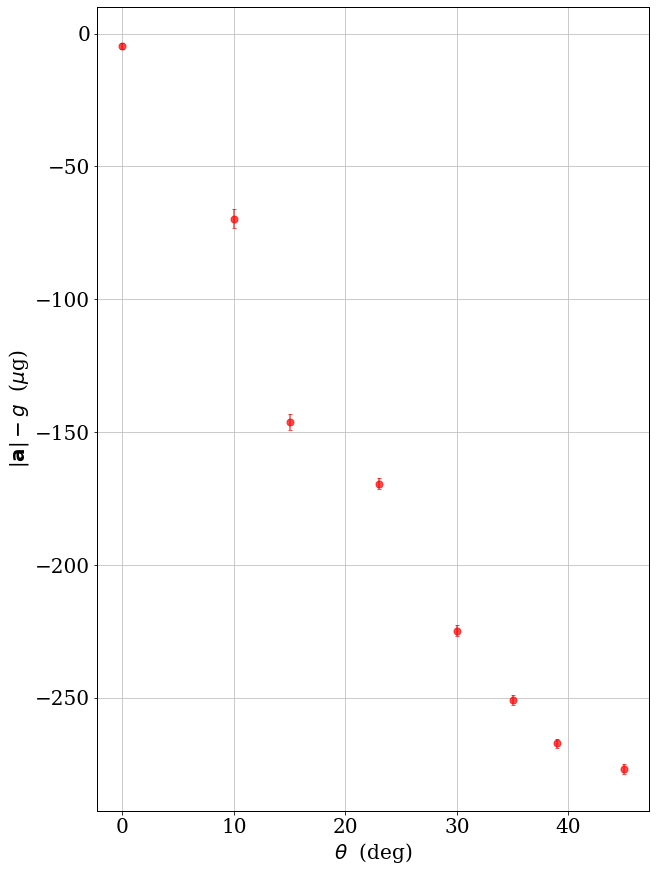

In [36]:
## Set plot options
plt.rc('font', size=20, family='serif')
plt.rc('axes', titlesize=12, labelsize=20, edgecolor='black', linewidth=1)
plt.rc('lines', linewidth=1.5, markersize=14)
plt.rc('legend', fontsize=16, frameon=False, handletextpad=0.4)

PlotOpts = {'Color': 'red', 'Linestyle': 'None', 'Marker': '.', 'Title': 'None',
            'xLabel': r'$\theta$  (deg)', 'yLabel': r'$|\mathbf{a}| - g$  ($\mu$g)', 'LegLabel': 'None', 'Legend': False,
            'LegLocation': 'best'}

(nRows, nCols) = (1,1)
fig, axs = plt.subplots(nrows=nRows, ncols=nCols, figsize=(9,12), sharex='col', constrained_layout=True)

gExp = np.zeros((2,nSummary+1))

for s in range(nSummary):
    aExp   = np.empty((3,4,2), dtype=object) ## [iax,ik,iErr]
    RamanT = SummaryDF[s][0][0]['RamanT'].to_numpy()
    nT     = len(RamanT)
    
    for iax in range(3):
        for ik in range(2):
            aExp[iax,ik,0] = SummaryDF[s][iax][ik]['gExp'].to_numpy()
            aExp[iax,ik,1] = SummaryDF[s][iax][ik]['gExp_Err'].to_numpy()
        
        aExp[iax,2,0] = 0.5*(aExp[iax,0,0] - aExp[iax,1,0])
        aExp[iax,3,0] = 0.5*(aExp[iax,0,0] + aExp[iax,1,0])
        aExp[iax,2,1] = 0.5*np.sqrt(aExp[iax,0,1]**2 + aExp[iax,1,1]**2)
        aExp[iax,3,1] = aExp[iax,2,1]
        aDep_Avg      = np.average(aExp[iax,3,0], weights=1/aExp[iax,3,1])

    gExp[0,s] = np.sqrt(aExp[0,3,0][nT-1]**2 + aExp[1,3,0][nT-1]**2 + aExp[2,3,0][nT-1]**2)
    gExp[1,s] = np.sqrt(aExp[0,3,1][nT-1]**2 + aExp[1,3,1][nT-1]**2 + aExp[2,3,1][nT-1]**2)

TiltList2 = TiltList + [0.]
gExp[0,nSummary] = (1. - 4.7E-6)*gLocal
gExp[1,nSummary] = 1.E-6*gLocal

iXUtils.CustomPlot(axs, PlotOpts, TiltList2, (gExp[0]/gLocal - 1)*1.E6, gExp[1]/gLocal*1.E6, LogScale=[False,False])

plt.show()